In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from myfunc import timer
from myfunc import DirMan
import config
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import matplotlib.font_manager as fm
from pylab import rcParams



# configuration
# resolution = "0p1"
resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera04/zhwei/xionghui/bedrock/run/{resolution}/'
post_data_path = '/tera04/zhwei/xionghui/bedrock/'
shp_path = '/tera04/zhwei/xionghui/bedrock/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'
if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

pd.set_option('display.max_columns', None)
# font = {'family': 'Times New Roman'}
font = {'family': 'Arial'}
matplotlib.rc('font', **font)

params = {'backend': 'ps',
          'legend.frameon': False,
          'xtick.direction': 'out',
          'ytick.direction': 'out',
          'savefig.bbox': 'tight',
          'axes.unicode_minus': False,
          "mathtext.default":"regular",
          'text.usetex': False}
rcParams.update(params)

font_properties = fm.FontProperties(weight='bold')

In [2]:
## Extract Columns for Barplot (NOTE: Must exclude first header row manually)
roots = pd.read_csv(f'/tera04/zhwei/xionghui/bedrock/run/0p1/csv/site.csv', encoding='latin-1')
# print(roots)
roots = roots[roots['Sbedrock_field_min'] > 0]
roots = roots.sort_values(by=['lon']).reset_index(drop=True)
barplot = pd.DataFrame()
barplot = roots.copy()
# print(barplot)
barplot

,Unnamed: 0,lat,lon,Measure,Citation,Sbedrock_field_min,Sbedrock_field_max,Sbedrock,Ssoil,Soil_depth,DTB,mask1,mask2,mask3,mask,num
0,59,39.7273,-123.6433,Y,"Rempe and Dietrich, 2018",140.0,420.0,290.320860,152.596080,45.0,124.930670,NaN,1.0,1.0,NaN,59
1,56,39.5745,-123.4770,Y,"Hahm, 2020",37.0,173.0,320.583160,99.357370,NaN,100.000000,1.0,1.0,1.0,1.0,56
2,54,39.1530,-122.3480,Y,"Hahm, 2022",80.0,300.0,233.371480,79.880260,50.0,100.000000,1.0,0.0,1.0,NaN,54
3,47,37.0879,-119.2505,Y,"O'Geen, 2018",44.0,270.0,384.194270,82.869640,NaN,100.000000,1.0,1.0,1.0,1.0,47
4,44,35.9570,-118.6300,Y,Hubbert 2001b,135.0,380.0,434.338070,63.236490,75.0,74.929820,1.0,1.0,NaN,NaN,44
5,34,33.4517,-117.1735,Y,"Bornyasz, 2005",120.0,120.0,220.457100,40.271910,62.0,50.078670,1.0,1.0,NaN,NaN,34
6,38,33.8100,-116.6800,Y,"Sternberg, 1996",394.0,406.0,109.356170,19.182775,35.0,24.929976,1.0,0.0,1.0,NaN,38
7,61,40.0280,-105.4880,Y,"Burns, 2022",19.0,64.0,15.482319,81.912735,30.0,100.000000,1.0,0.0,1.0,NaN,61
8,12,29.8500,-98.4900,Y,"McCole and Stern, 2007",999.0,999.0,308.051000,104.886410,32.0,124.976830,NaN,1.0,1.0,NaN,12
9,15,29.9400,-98.1200,Y,"Schwinning, 2008",999.0,999.0,144.505280,82.507030,NaN,100.000000,1.0,1.0,1.0,1.0,15


In [3]:
df = barplot.copy()
df['Sbedrock_field_mean'] = (df['Sbedrock_field_min'] + df['Sbedrock_field_max']) / 2
df['std_dev_row'] = df[['Sbedrock', 'Sbedrock_field_mean']].apply(lambda x: np.std(x), axis=1)
std_dev = np.std(df[['Sbedrock', 'Sbedrock_field_mean']], axis=0)
print("标准差：")
print(std_dev)

diff = df['Sbedrock'] - df['Sbedrock_field_mean']
std_dev_diff = np.std(diff)
print("Sbedrock 与 Sbedrock_field_mean 之间的标准差：", std_dev_diff)

df

标准差：
Sbedrock               134.049111
Sbedrock_field_mean    333.555260
dtype: float64
Sbedrock 与 Sbedrock_field_mean 之间的标准差： 346.8408957169718


,Unnamed: 0,lat,lon,Measure,Citation,Sbedrock_field_min,Sbedrock_field_max,Sbedrock,Ssoil,Soil_depth,DTB,mask1,mask2,mask3,mask,num,Sbedrock_field_mean,std_dev_row
0,59,39.7273,-123.6433,Y,"Rempe and Dietrich, 2018",140.0,420.0,290.320860,152.596080,45.0,124.930670,NaN,1.0,1.0,NaN,59,280.0,5.160430
1,56,39.5745,-123.4770,Y,"Hahm, 2020",37.0,173.0,320.583160,99.357370,NaN,100.000000,1.0,1.0,1.0,1.0,56,105.0,107.791580
2,54,39.1530,-122.3480,Y,"Hahm, 2022",80.0,300.0,233.371480,79.880260,50.0,100.000000,1.0,0.0,1.0,NaN,54,190.0,21.685740
3,47,37.0879,-119.2505,Y,"O'Geen, 2018",44.0,270.0,384.194270,82.869640,NaN,100.000000,1.0,1.0,1.0,1.0,47,157.0,113.597135
4,44,35.9570,-118.6300,Y,Hubbert 2001b,135.0,380.0,434.338070,63.236490,75.0,74.929820,1.0,1.0,NaN,NaN,44,257.5,88.419035
5,34,33.4517,-117.1735,Y,"Bornyasz, 2005",120.0,120.0,220.457100,40.271910,62.0,50.078670,1.0,1.0,NaN,NaN,34,120.0,50.228550
6,38,33.8100,-116.6800,Y,"Sternberg, 1996",394.0,406.0,109.356170,19.182775,35.0,24.929976,1.0,0.0,1.0,NaN,38,400.0,145.321915
7,61,40.0280,-105.4880,Y,"Burns, 2022",19.0,64.0,15.482319,81.912735,30.0,100.000000,1.0,0.0,1.0,NaN,61,41.5,13.008840
8,12,29.8500,-98.4900,Y,"McCole and Stern, 2007",999.0,999.0,308.051000,104.886410,32.0,124.976830,NaN,1.0,1.0,NaN,12,999.0,345.474500
9,15,29.9400,-98.1200,Y,"Schwinning, 2008",999.0,999.0,144.505280,82.507030,NaN,100.000000,1.0,1.0,1.0,1.0,15,999.0,427.247360


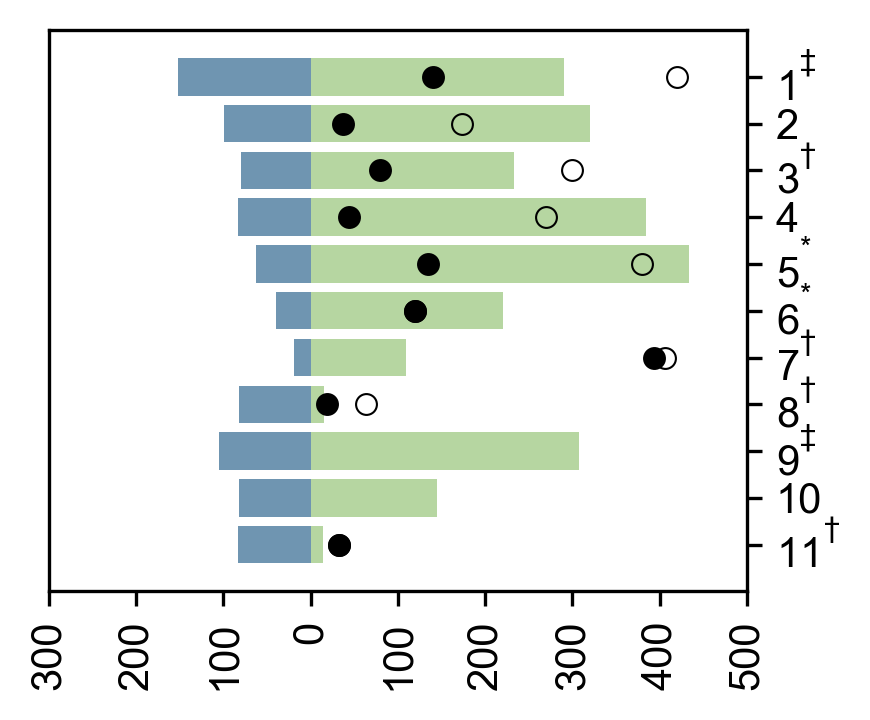

In [4]:

#barplot = barplot.dropna()
barplot['Ssoil'] = barplot['Ssoil'] * -1
barplot['Name'] = np.arange(1,12,1)

# barplot = barplot[0:20]
# barplot = barplot.sort_values(by = 'Number_For_Plotting')
# print(barplot)

# Make labels for X-axis to have accurate Ssoil and Dbedrock meanings
soillabels = list(np.arange(300, -100, step=-100))
dlabels = list(np.arange(100, 600, step=100))
labels = soillabels + dlabels

# Plot figure
plt.figure(figsize = (3, 2.5), dpi=300)
#plt.barh(barplot['Name'],barplot['Mean_D_bedrock_mm'], xerr = barplot['Stdev_D_bedrock_mm'], alpha=0.5, ecolor='black', capsize=3)
# plt.barh(barplot['Name'],barplot['Ssoil'], ecolor='black', capsize=3)


plt.barh(barplot['Name'],barplot['Sbedrock'], color = '#6faf45',alpha=0.5)
plt.barh(barplot['Name'],barplot['Ssoil'], color = '#6f95b1')


plt.plot(barplot['Sbedrock_field_min'],barplot['Name'], 'o', ms=5, markerfacecolor="black", markeredgecolor='black', markeredgewidth=0.5)
plt.plot(barplot['Sbedrock_field_max'],barplot['Name'],'o', ms=5, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.5)

# plt.xticks(np.arange(-150, 2050, step=50), labels = labels)
# plt.xticks(np.arange(0, 1600, step=200), labels = labels)
yticks = ['$1^{{‡}}$','2','$3^{{†}}$','4','$5^{{*}}$','$6^{{*}}$','$7^{{†}}$','$8^{{†}}$','$9^{{‡}}$','10','$11^{{†}}$']
plt.ylim(0, 12)
plt.yticks(np.arange(1, 12, 1), labels = yticks)
plt.xticks(np.arange(-300, 600, step=100), labels = labels)
plt.xlim(-300, 500)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
# ax.spines['left'].set_color('none')

## Uncomment for downloading fig
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.show()
# plt.savefig(f"{fig_path}/h1_fSb.pdf", transparent=True)

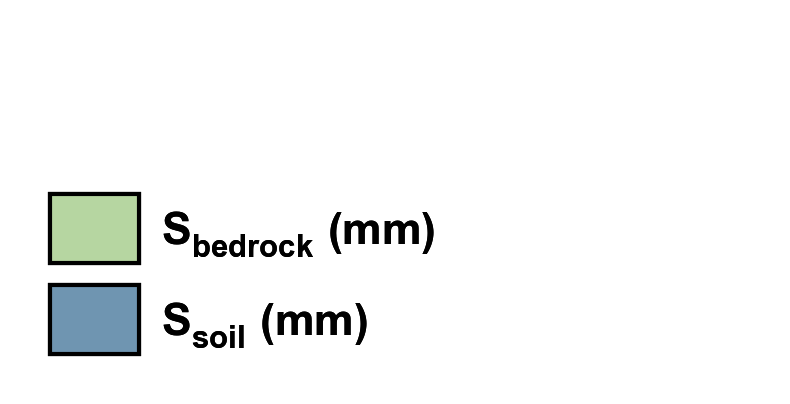

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(0)  

legend_elements1 = [
    Patch(facecolor='#b6d6a1', linewidth=3, edgecolor='black', label='$S_{{bedrock}}$ (mm)'),
    Patch(facecolor='#6f95b1', linewidth=3, edgecolor='black', label='$S_{{soil}}$ (mm)')
]

leg1 = ax.legend(
    handles=legend_elements1,
    loc='lower left',
    frameon=False,
    title='',
    handlelength=2, 
    handleheight=2,
    handletextpad=0.5,  
    labelspacing= 0.5,
    prop={'weight': 'bold', "size":32}
)

ax.add_artist(leg1)
plt.tight_layout()
plt.show()

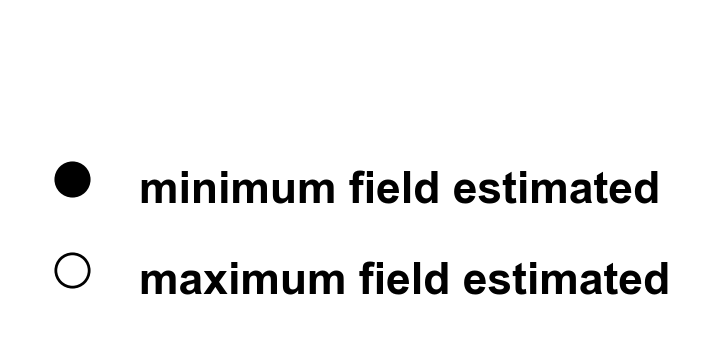

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(0)  

legend_elements2 = [
    Line2D([0], [0], marker='o', color='w', markeredgecolor='black', markerfacecolor='black',
        markersize=24, markeredgewidth=2, label='minimum field estimated'),
    Line2D([0], [0], marker='o', color='w', markeredgecolor='black', markerfacecolor='none', 
        markersize=24, markeredgewidth=2, label='maximum field estimated')
]
# 再添加第二个图例
ax.legend(
    handles=legend_elements2,
    loc='lower right',
    frameon=False,
    title='',
    handlelength=2, 
    handleheight=2,
    handletextpad=0.5,  
    labelspacing= 0.5,
    prop={'weight': 'bold', "size":32}
)

# 设置图形标题和布局
# plt.title('Global Woody Vegetation Cover with Bedrock Depth', fontsize=14, pad=20)
plt.tight_layout()
plt.show()